In [ ]:
# This code is for reference only, it is from a previous setup that was then replaced by voter

In [1]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

# experiemnt with new class 3 mixup. (all runs include this new data in augment_class3_4times_with_time_mixup)
# 1. shallow model, no weights
# 2. deep model, no weights
# 3. shallow model, weights = X
# 4. shallow model, weights = Y
# 5. shallow model, weights = Z
# 6 shallow model, weights = W
# 7 shallow model, weights = A

# 7. deep model, weights = X
# 8. deep model, weights = Y
# 9. deep model, weights = Z

train_filepaths = ["standard1/train.csv", "augment_class3_4times_with_time_mixup/train.csv",  "augment_class3_10times_with_time_mixup/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_items = len(train_loader.dataset)
print("Train Items: ", num_items)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_class = MyNN
shallow_model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
deep_model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Xrelweights = torch.tensor([3, 4, 3, 2, 1, 1, 1, 1, 2], dtype=torch.float)
Xweights = Xrelweights / Xrelweights.mean()
Xloss_fn = nn.CrossEntropyLoss(weight=Xweights.to(device))

Yrelweights = torch.tensor([3, 3, 3, 1, 1, 1, 1, 1, 1], dtype=torch.float)
Yweights = Yrelweights / Yrelweights.mean()
Yloss_fn = nn.CrossEntropyLoss(weight=Yweights.to(device))

Zrelweights = torch.tensor([1, 1.5, 1, 5, 1.5, 1.5, 1.5, 1.5, 3], dtype=torch.float)
Zweights = Zrelweights / Zrelweights.mean()
Zloss_fn = nn.CrossEntropyLoss(weight=Zweights.to(device))

Wrelweights = torch.tensor([100, .1, 100, .1, .1, .1, .1, .1, .1], dtype=torch.float)
Wweights = Wrelweights / Wrelweights.mean()
Wloss_fn = nn.CrossEntropyLoss(weight=Wweights.to(device))

Arelweights = torch.tensor([1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.float)
Aweights = Arelweights / Arelweights.mean()
Aloss_fn = nn.CrossEntropyLoss(weight=Aweights.to(device))

Brelweights = torch.tensor([1, .5, 1, 0, 0, .25, .25, 0, 0], dtype=torch.float)
Bweights = Brelweights / Brelweights.mean()
Bloss_fn = nn.CrossEntropyLoss(weight=Bweights.to(device))

loss_fn = nn.CrossEntropyLoss()

print("done")

Train Items:  13559
done


/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode
-------------------------------------------------------
0 | model_body | Sequential       | 822 K  | eval
1 | loss_fn    | CrossEntropyLoss | 0      | eval
-------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
0         Modules in train mode
7         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 7 module(s) in eval mode at the s

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 47.297250270843506


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7782160043716431     │
│         test_loss         │    0.5690932869911194     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.3524017333984375


<Figure size 1600x1600 with 0 Axes>

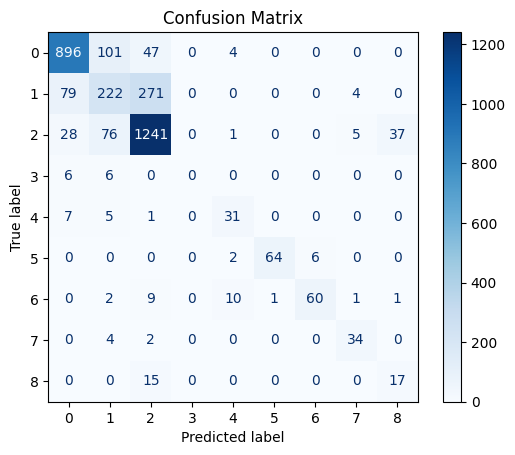

Logger Metics:  logs/run2_model1/version_2/metrics.csv


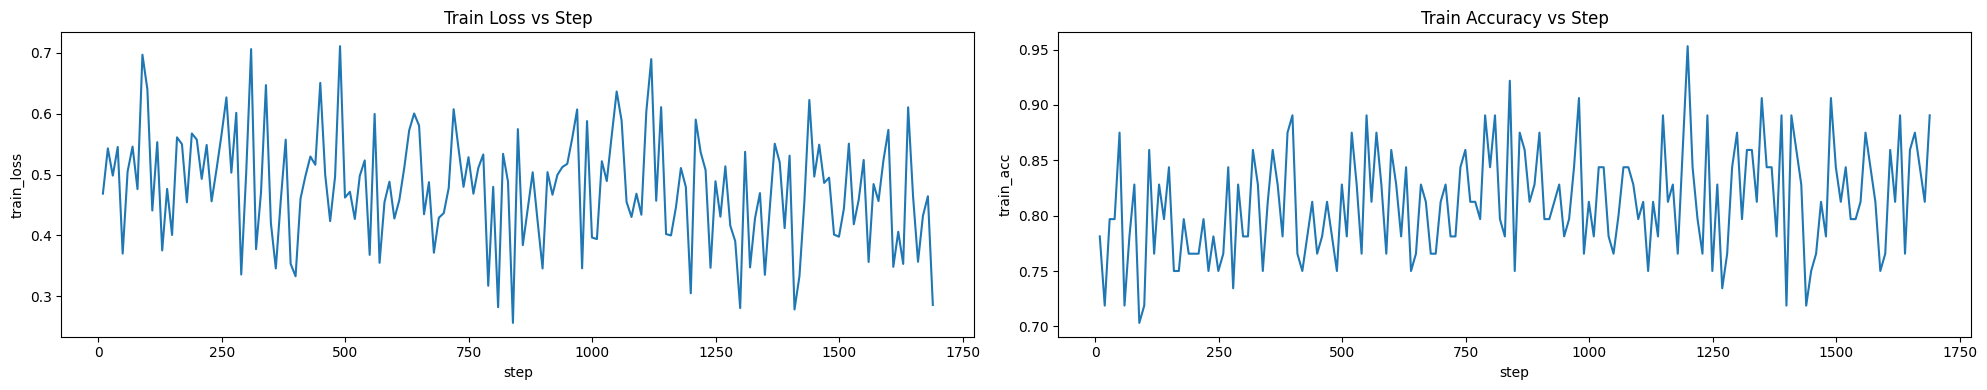

done


In [11]:
# 1.
model_name = "run2_model1" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode
-------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval
1 | loss_fn    | CrossEntropyLoss | 0      | eval
-------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
0         Modules in train mode
9         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 9 module(s) in eval mode at the s

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 60.721449851989746


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7976334691047668     │
│         test_loss         │    0.5440756678581238     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.4961750507354736


<Figure size 1600x1600 with 0 Axes>

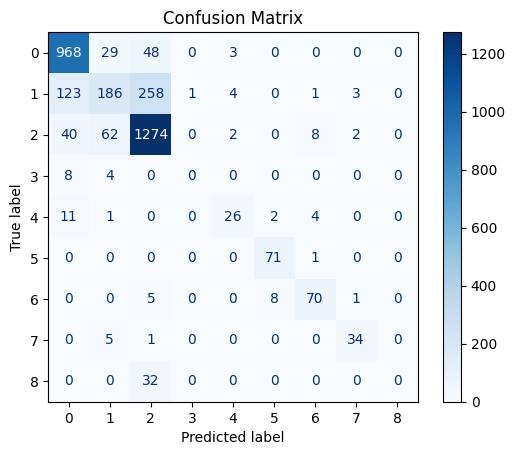

Logger Metics:  logs/run2_model2/version_1/metrics.csv


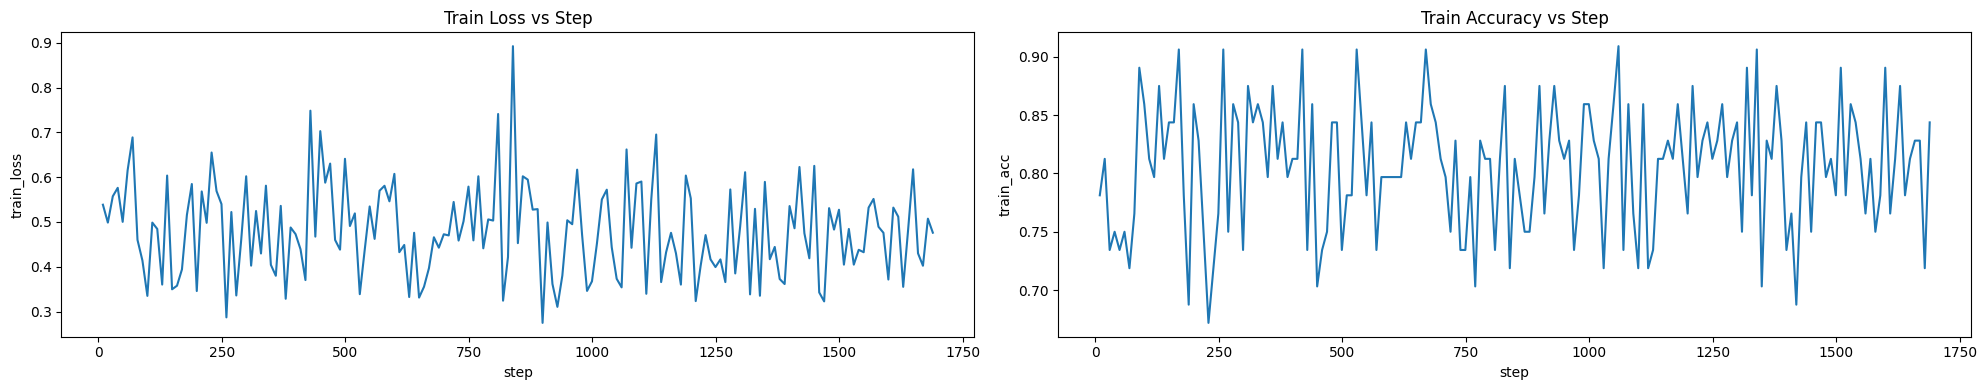

done


In [12]:
# 2.
model_name = "run2_model2" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, deep_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
1         Modules in train mode
6         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 6 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 47.21680951118469


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7484830021858215     │
│         test_loss         │    0.6905605792999268     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.4328827857971191


<Figure size 1600x1600 with 0 Axes>

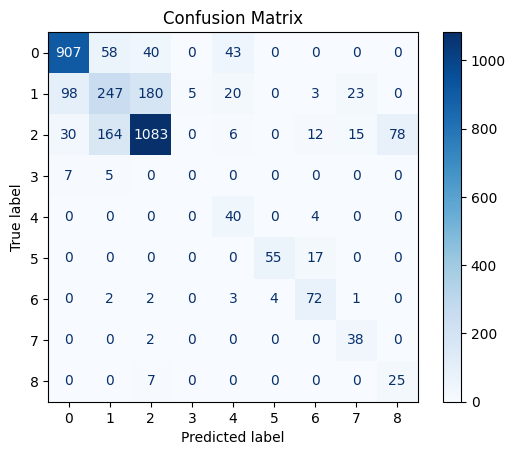

Logger Metics:  logs/run2_model11/version_0/metrics.csv


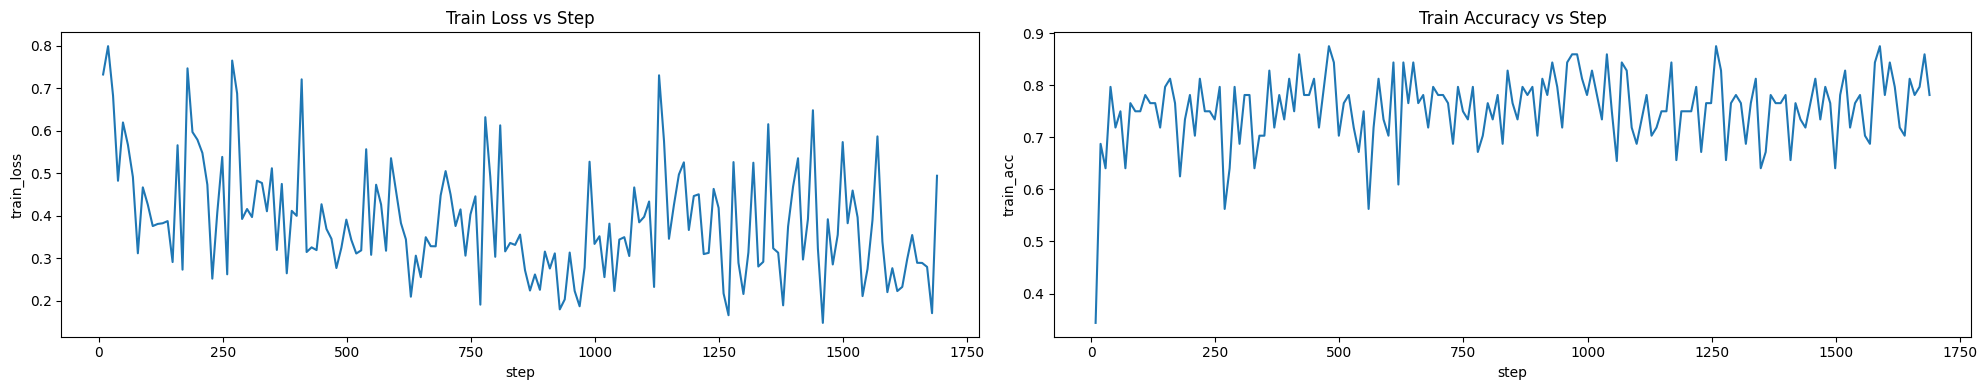

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode
-------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | eval
1 | loss_fn    | CrossEntropyLoss | 0      | eval
-------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
0         Modules in train mode
9         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 9 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 60.579943895339966


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7512136101722717     │
│         test_loss         │    0.5577735304832458     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.636319637298584


<Figure size 1600x1600 with 0 Axes>

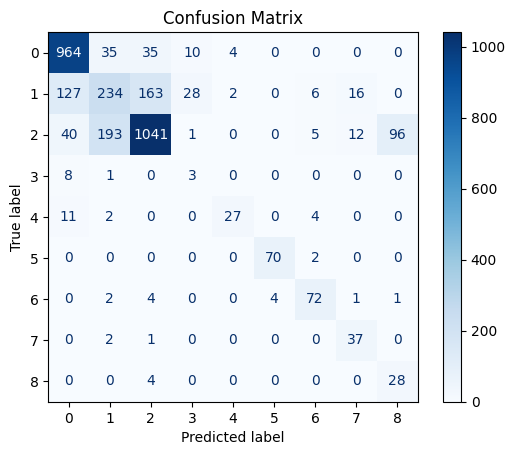

Logger Metics:  logs/run2_model12/version_0/metrics.csv


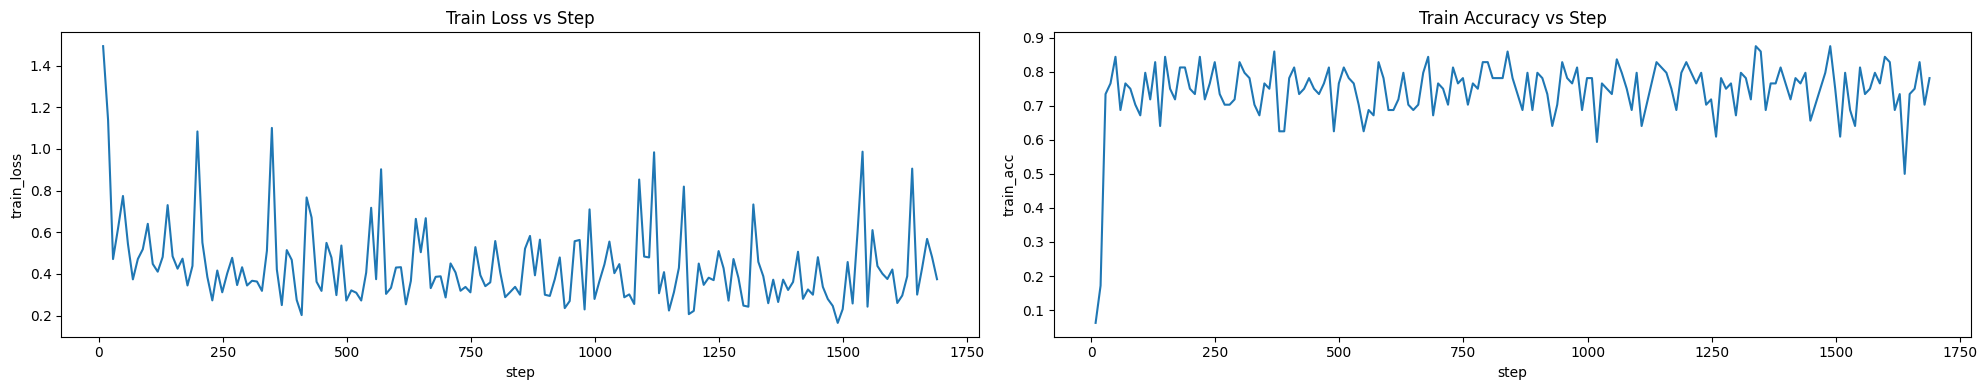

done


In [4]:
#I want bins with class 0, 1, 2 seperate from eahc other as much as possible.

relweights = torch.tensor([.1, .1, .1, 1, 1, 1, 1, 1, 1], dtype=torch.float)
weights = relweights / relweights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

model_name = "run2_model11" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run2_model12" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, deep_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 49.13147497177124


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7709344625473022     │
│         test_loss         │    0.5812544822692871     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.4600443840026855


<Figure size 1600x1600 with 0 Axes>

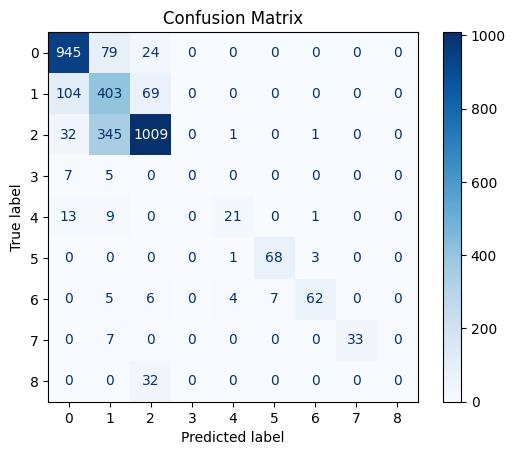

Logger Metics:  logs/run2_model3/version_0/metrics.csv


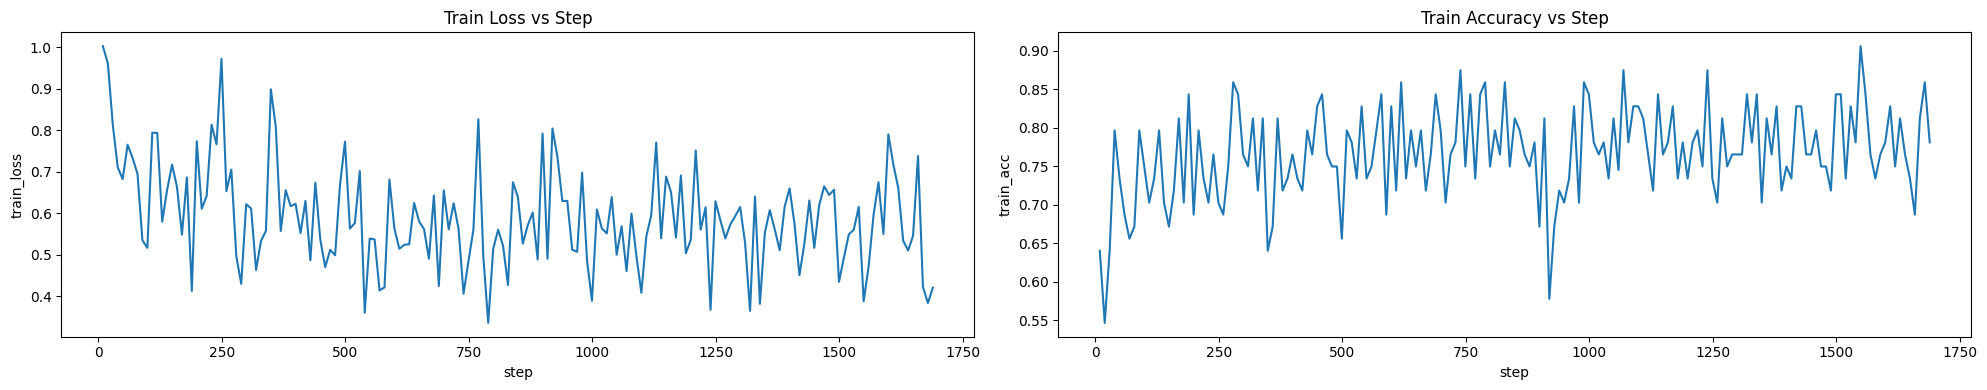

done


In [16]:
# 3.
model_name = "run2_model3" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Xloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 45.978002309799194


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7791262269020081     │
│         test_loss         │    0.5257291793823242     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.467271089553833


<Figure size 1600x1600 with 0 Axes>

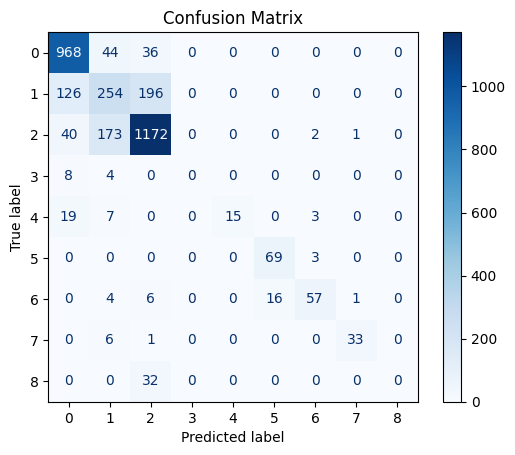

Logger Metics:  logs/run2_model4/version_0/metrics.csv


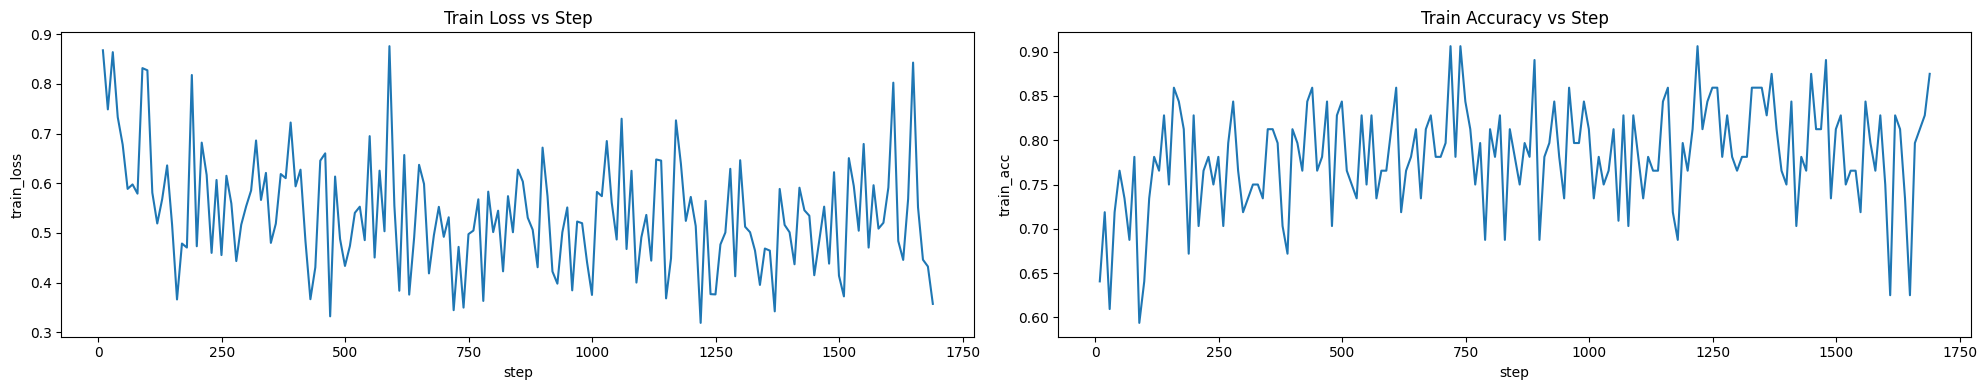

done


In [18]:
# 4.
model_name = "run2_model4" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Yloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 45.1620659828186


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7675970792770386     │
│         test_loss         │    0.6409433484077454     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5605125427246094


<Figure size 1600x1600 with 0 Axes>

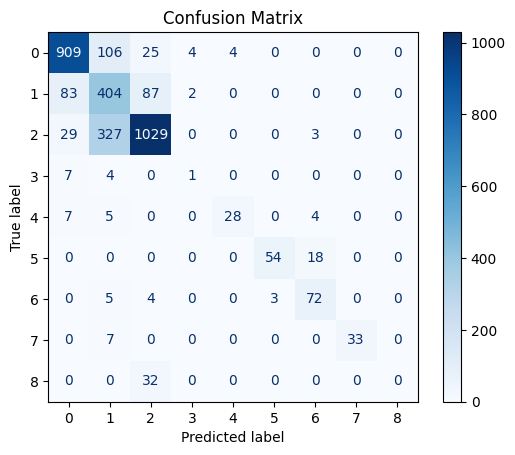

Logger Metics:  logs/run2_model5/version_0/metrics.csv


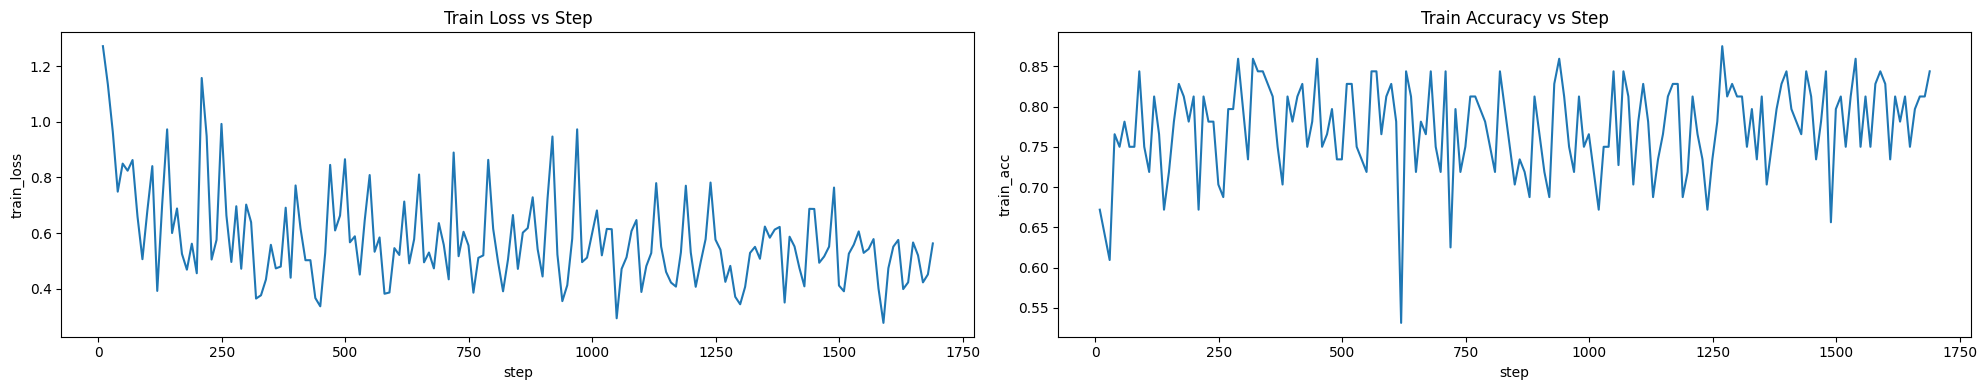

done


In [20]:
# 5.
model_name = "run2_model5" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Zloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 45.2238028049469


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7245145440101624     │
│         test_loss         │    0.16381055116653442    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5677096843719482


<Figure size 1600x1600 with 0 Axes>

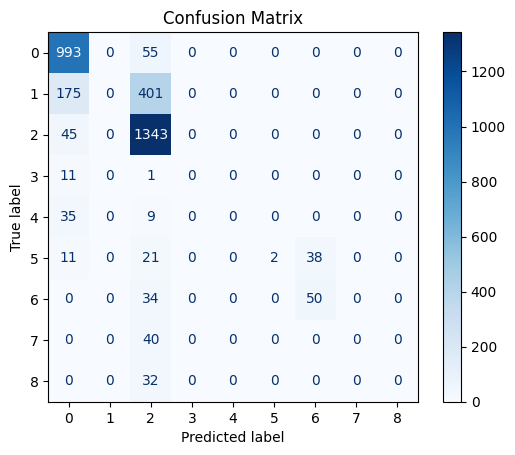

Logger Metics:  logs/run2_model6/version_2/metrics.csv


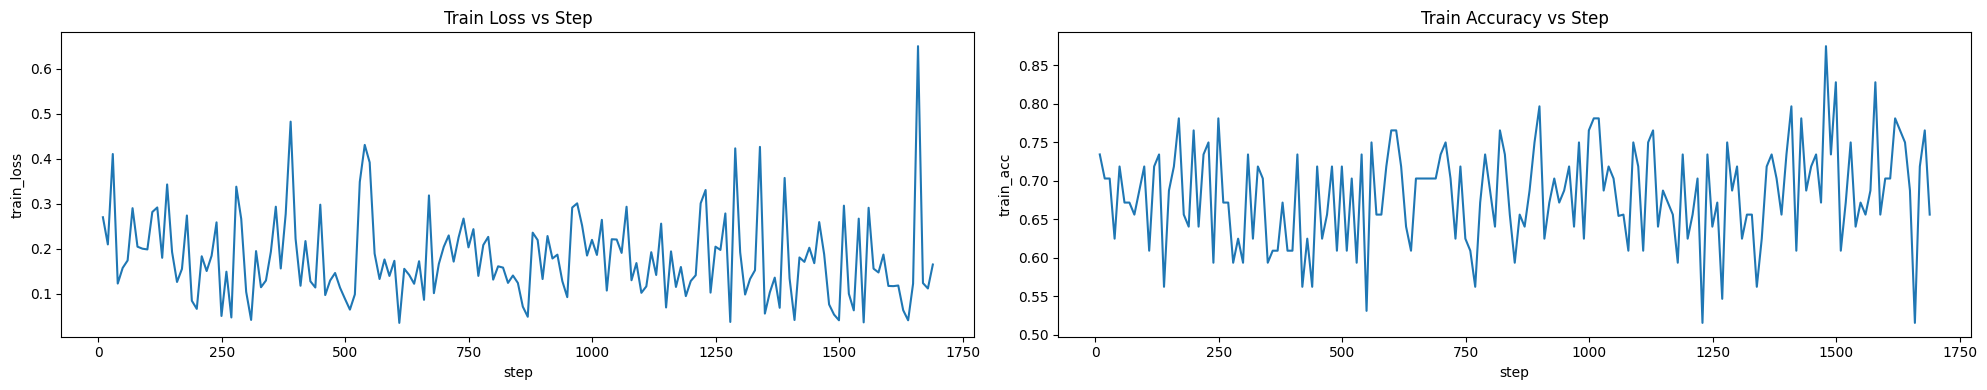

done


In [27]:
# 6.
model_name = "run2_model6" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Wloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
1         Modules in train mode
6         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 6 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 48.474645376205444


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.728762149810791     │
│         test_loss         │    0.5133121013641357     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5755491256713867


<Figure size 1600x1600 with 0 Axes>

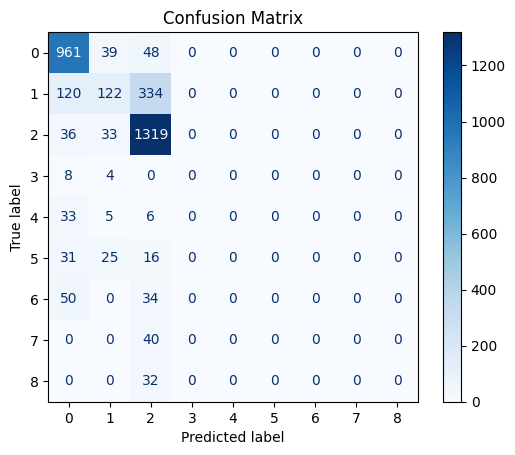

Logger Metics:  logs/run2_model7/version_0/metrics.csv


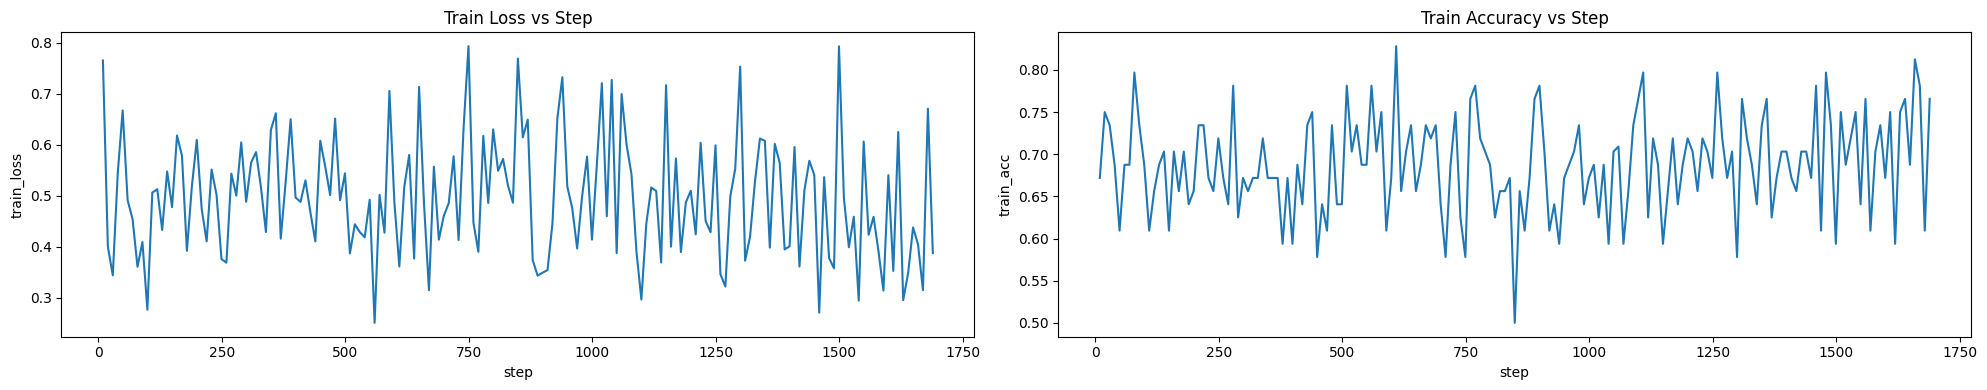

done


In [28]:
# 7.
model_name = "run2_model7" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Aloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 44.4000608921051


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7618325352668762     │
│         test_loss         │    0.41925308108329773    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5663890838623047


<Figure size 1600x1600 with 0 Axes>

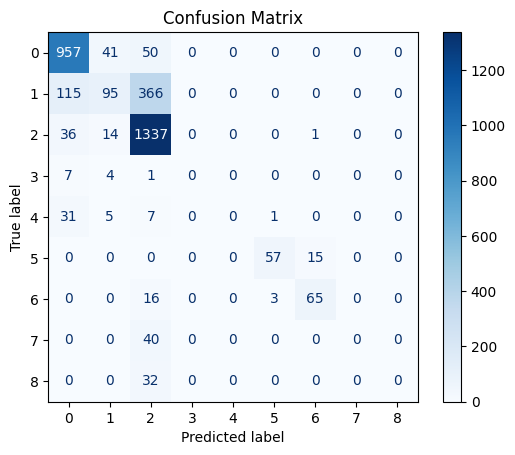

Logger Metics:  logs/run2_model8/version_0/metrics.csv


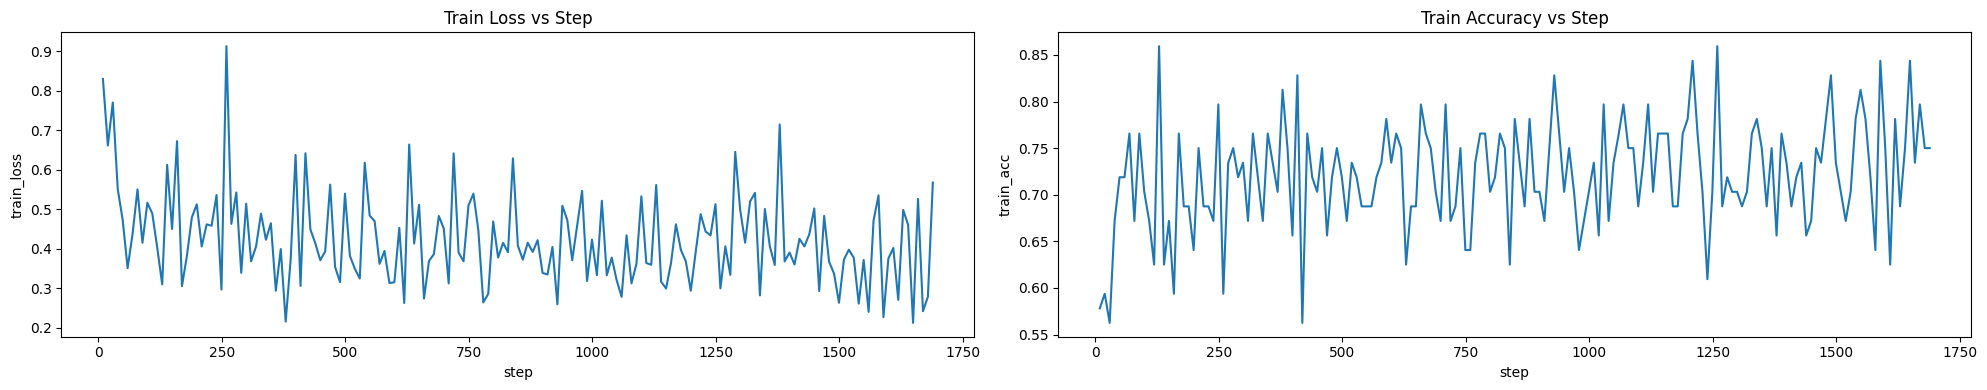

done


In [2]:
#8.
model_name = "run2_model8" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, Bloss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | eval 
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
1         Modules in train mode
6         Modules in eval mode
/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 6 module(s) in eval mode at 

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 47.60567665100098


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.0749393180012703     │
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.3928604125976562


<Figure size 1600x1600 with 0 Axes>

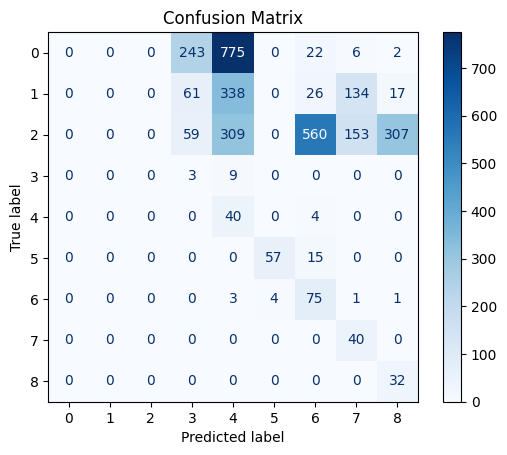

Logger Metics:  logs/run2_model9/version_0/metrics.csv


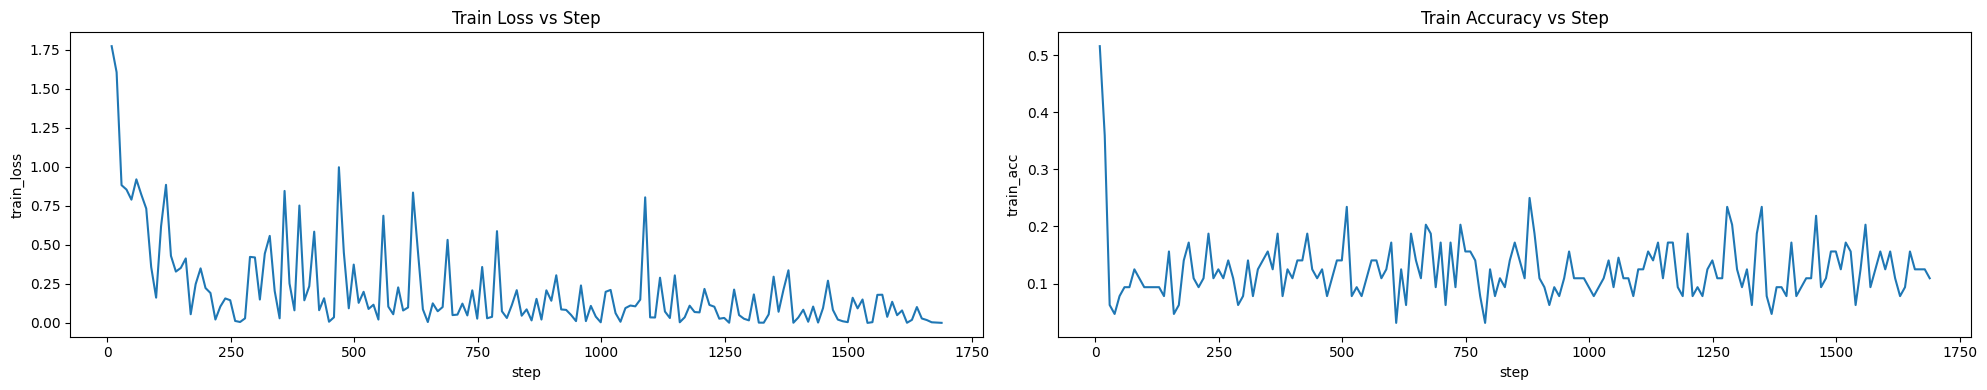

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | eval 
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
8         Modules in train mode
1         Modules in eval mode


done


/usr/local/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:527: Found 1 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=8` reached.


Train Time (s): 60.471522092819214


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.07129854708909988    │
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5721309185028076


<Figure size 1600x1600 with 0 Axes>

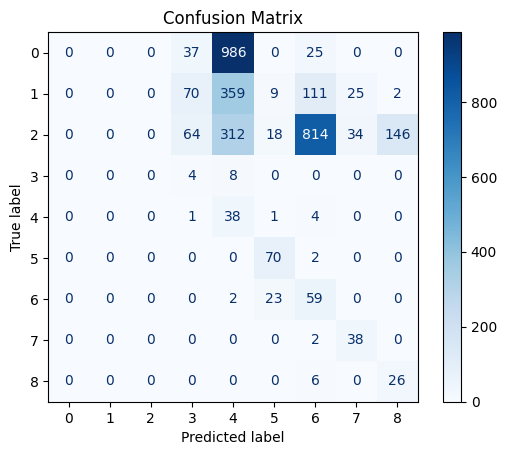

Logger Metics:  logs/run2_model10/version_0/metrics.csv


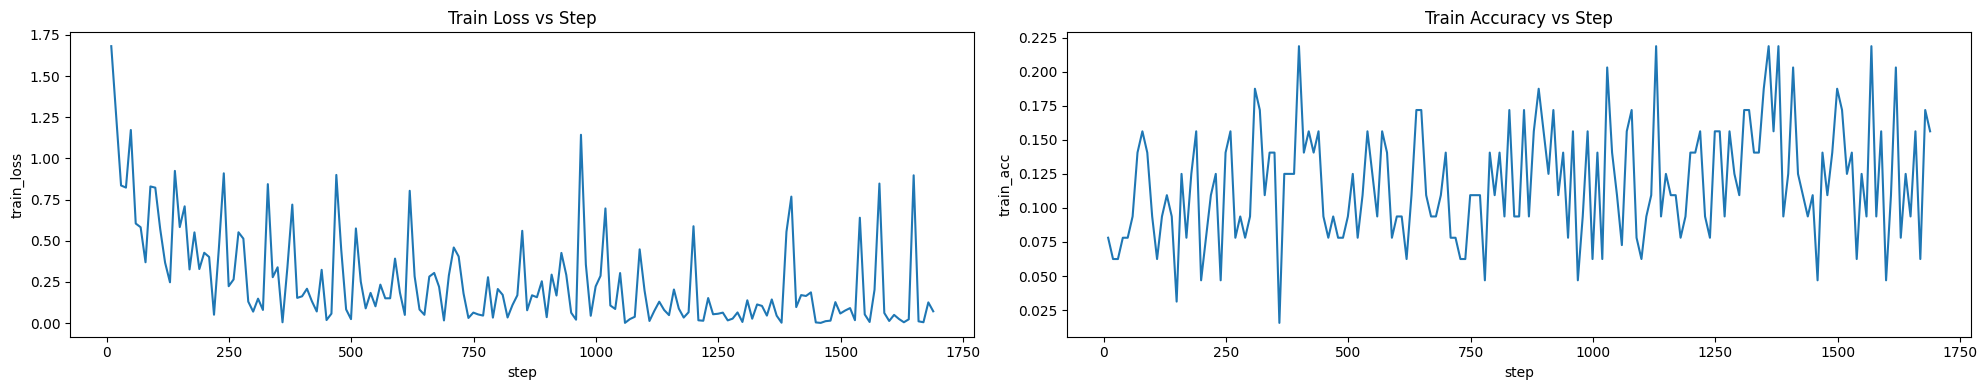

done


In [3]:
#I want bins with class 0, 1, 2 seperate from eahc other as much as possible.

relweights = torch.tensor([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=torch.float)
weights = relweights / relweights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

model_name = "run2_model9" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, shallow_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

model_name = "run2_model10" #### REMEMBER TO CHANGE THE NAME
max_epochs = 8
manager = Manager(model_name, max_epochs, model_class, deep_model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")